## Time Series analysis - Part 2

In [1]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


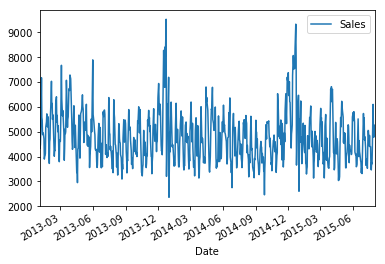

In [2]:
# Load the data and set the DateTime index
data = pd.read_csv('rossmann.csv', skipinitialspace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
# Filter to Store 1
store1_data = data[data.Store == 1]
# Filter to open days
store1_open_data = store1_data[store1_data.Open==1]
# Plot the sales over time
store1_open_data[['Sales']].plot()

In [ ]:
print(store1_data.Sales.autocorr(lag=1))
print(store1_data.Sales.autocorr(lag=2))

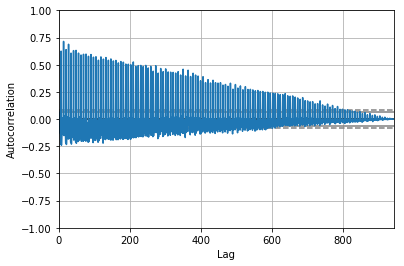

In [4]:
%matplotlib inline
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(store1_data.Sales)

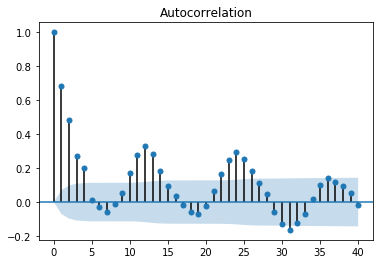

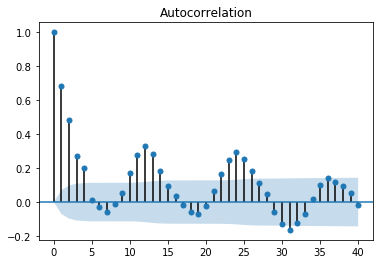

In [9]:
#acf = auto correlation function
plot_acf(store1_open_data.Sales, lags =40)

In [ ]:

plot_acf(store1_data.Sales, lags=25)

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf # partial autocorrelation plot.
plot_pacf(store1_data.Sales, lags=10)

In [10]:
from statsmodels.tsa.arima_model import ARMA
store1_sales_data = store1_open_data[['Sales']].astype(float)
model = ARMA(store1_sales_data, (1, 0)).fit() # 1 parameter means just use AR, 0 = dont use MA
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 0)   Log Likelihood               -6267.326
Method:                       css-mle   S.D. of innovations            739.079
Date:                Thu, 04 May 2017   AIC                          12540.651
Time:                        19:53:41   BIC                          12554.633
Sample:                    07-31-2015   HQIC                         12546.029
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.8515     82.985     57.394      0.000      4600.205  4925.498
ar.L1.Sales     0.6822      0.026     26.122      0.000         0.631     0.733
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4659           +0.0000j            1.4659            0.0000
-----------------------------------------------------------------------------
"""

Intercept coef (4762)  this is the mean for the data.
Coef is 0.6822 which is <1 and tells us that there is a downward trend over time.  
To make a prediction by taking the mean and adding the coeficient.  
AIC is a score that tells us how well the model fits (similar to MSE) - the smaller values are better.  
Use the P value as before to only include significant features.

In [11]:
model = ARMA(store1_sales_data, (2, 0)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(2, 0)   Log Likelihood               -6267.032
Method:                       css-mle   S.D. of innovations            738.800
Date:                Thu, 04 May 2017   AIC                          12542.063
Time:                        19:58:20   BIC                          12560.705
Sample:                    07-31-2015   HQIC                         12549.233
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.9851     85.262     55.863      0.000      4595.875  4930.095
ar.L1.Sales     0.6634      0.036     18.537      0.000         0.593     0.734
ar.L2.Sales     0.0274      0.036      0.767      0.443        -0.043     0.098
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4235           +0.0000j            1.4235            0.0000
AR.2          -25.5915           +0.0000j           25.5915            0.5000
-----------------------------------------------------------------------------
"""

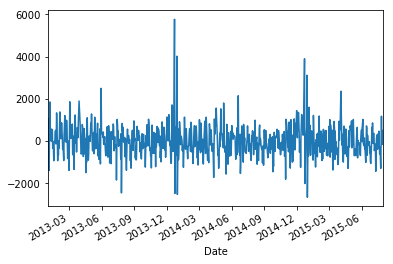

In [12]:
model.resid.plot() # this is calculating the difference between the actual and model prediction

If the residual goes up over time, then the error is going up and the model isnt able to predict the trend.  
A constant line, similar to above, suggests that the model is performing with a similar error.  It encounters two peaks as it struggles to predict december seasonality.  
The residuals are calculated on the learning data set (not unseen data).

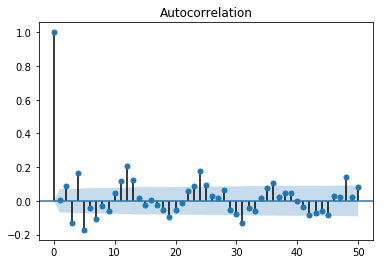

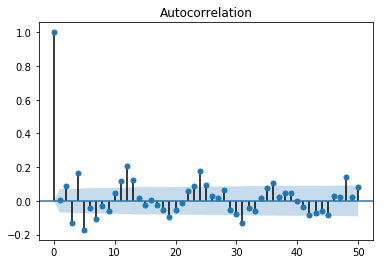

In [13]:
plot_acf(model.resid, lags=50) # plotting the autocorrelation of the residuals

This fluctuation shows us that the data isn't stationary.

Other methods to test if your data is stationary are Dicky Fuller and Augmented Dicky Fuller methods.  You check, then transform your data run the tests again.

### Auto Regreassive Moving Average (ARMA)

In [ ]:
model = ARMA(store1_sales_data, (1, 1)).fit()
model.summary()

In [14]:
from statsmodels.tsa.arima_model import ARIMA

# this is arima model, but differences is turned off.
model = ARIMA(store1_sales_data, (1, # AR
                                  0, # Differences - turned off
                                  1)).fit() # MA 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Sales   No. Observations:                  781
Model:                     ARMA(1, 1)   Log Likelihood               -6267.111
Method:                       css-mle   S.D. of innovations            738.876
Date:                Thu, 04 May 2017   AIC                          12542.222
Time:                        20:14:00   BIC                          12560.865
Sample:                    07-31-2015   HQIC                         12549.392
                         - 01-02-2013                                         
===============================================================================
                  coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------
const        4762.6891     84.702     56.229      0.000      4596.676  4928.702
ar.L1.Sales     0.6979      0.035     20.095      0.000         0.630     0.766
ma.L1.Sales    -0.0294      0.045     -0.654      0.514        -0.118     0.059
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4328           +0.0000j            1.4328            0.0000
MA.1           34.0018           +0.0000j           34.0018            0.0000
-----------------------------------------------------------------------------
"""

### Auto Regressive Integrated Moving Average (ARIMA)

In [16]:
model = ARIMA(store1_sales_data, (1, 1, 1)).fit() # with differences turned on, this now builds AR and MA using differences 
                                                    #rather than actual values.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6261.011
Method:                       css-mle   S.D. of innovations            738.624
Date:                Thu, 04 May 2017   AIC                          12530.022
Time:                        20:18:11   BIC                          12548.659
Sample:                    07-30-2015   HQIC                         12537.190
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.5108      0.364      1.405      0.160        -0.202     1.223
ar.L1.D.Sales     0.6801      0.026     25.801      0.000         0.628     0.732
ma.L1.D.Sales    -1.0000      0.004   -240.410      0.000        -1.008    -0.992
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.4703           +0.0000j            1.4703            0.0000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [15]:
model = ARIMA(store1_sales_data, (1, 1, 0)).fit() #without MA
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -6313.616
Method:                       css-mle   S.D. of innovations            792.680
Date:                Thu, 04 May 2017   AIC                          12633.233
Time:                        20:18:05   BIC                          12647.211
Sample:                    07-30-2015   HQIC                         12638.609
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.2161     24.028      0.009      0.993       -46.877    47.309
ar.L1.D.Sales    -0.1815      0.035     -5.150      0.000        -0.251    -0.112
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -5.5103           +0.0000j            5.5103            0.5000
-----------------------------------------------------------------------------
"""

In [22]:
 store1_sales_data.Sales.diff(1).autocorr(1)

-0.18144101447610664

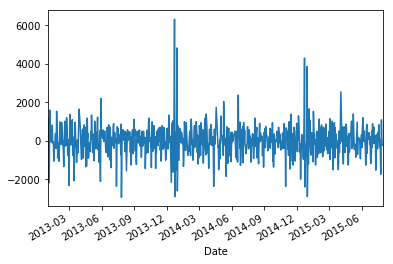

In [23]:
 store1_sales_data.Sales.diff(1).plot()

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


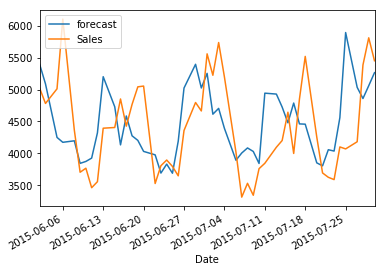

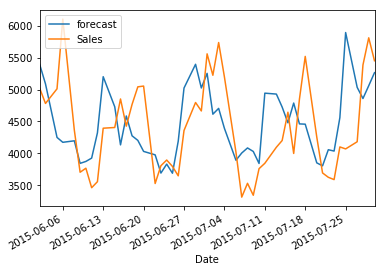

In [17]:
# this is showing the prediction on the learning data set 
model.plot_predict(1, 50) # using a 50 period window of time.

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


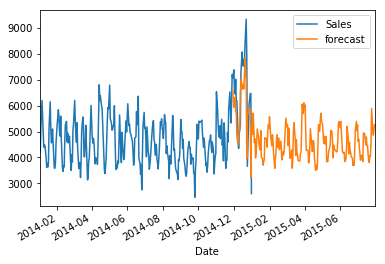

In [20]:
import matplotlib.pyplot as plt

# showing the actuals with a forecast for *seen* data. - see below for example of unseen.

fig, ax = plt.subplots()
ax = store1_sales_data['2014'].plot(ax=ax)
fig = model.plot_predict(1,200, ax=ax, plot_insample=False) # predict 200 points (that's why there is some overlap with actuals)

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  780
Model:                 ARIMA(7, 1, 2)   Log Likelihood               -6221.636
Method:                       css-mle   S.D. of innovations            703.783
Date:                Thu, 04 May 2017   AIC                          12465.272
Time:                        20:43:07   BIC                          12516.524
Sample:                    07-30-2015   HQIC                         12484.984
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             0.6859      4.555      0.151      0.880        -8.242     9.613
ar.L1.D.Sales     0.8404      0.211      3.982      0.000         0.427     1.254
ar.L2.D.Sales    -0.1504      0.145     -1.038      0.300        -0.434     0.134
ar.L3.D.Sales    -0.1831      0.046     -3.976      0.000        -0.273    -0.093
ar.L4.D.Sales     0.2557      0.060      4.296      0.000         0.139     0.372
ar.L5.D.Sales    -0.3381      0.067     -5.018      0.000        -0.470    -0.206
ar.L6.D.Sales     0.0691      0.074      0.931      0.352        -0.076     0.215
ar.L7.D.Sales    -0.0656      0.050     -1.325      0.185        -0.163     0.031
ma.L1.D.Sales    -1.1350      0.209     -5.443      0.000        -1.544    -0.726
ma.L2.D.Sales     0.2373      0.197      1.203      0.229        -0.149     0.624
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2128           -0.0000j            1.2128           -0.5000
AR.2            1.0141           -0.4950j            1.1285           -0.0723
AR.3            1.0141           +0.4950j            1.1285            0.0723
AR.4           -0.1357           -1.7544j            1.7597           -0.2623
AR.5           -0.1357           +1.7544j            1.7597            0.2623
AR.6            0.2547           -1.7666j            1.7849           -0.2272
AR.7            0.2547           +1.7666j            1.7849            0.2272
MA.1            1.1647           +0.0000j            1.1647            0.0000
MA.2            3.6177           +0.0000j            3.6177            0.0000
-----------------------------------------------------------------------------
"""

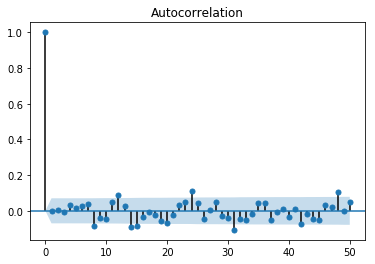

In [29]:
model = ARIMA(store1_sales_data, (7, # You can see from the output below that this calculates 7 through to 1 lags.
                                      # i.e. last month compared to previous month, last month compared to two months ago... 
                                  1, 
                                  2), 
              freq='M').fit() # it seems that freq can aggregate you data into different time periods, 
                                # so here 7 would represent 7 months.
plot_acf(model.resid, lags=50)
model.summary()

In [26]:
# This example is only learning from 2014 data and then plotting 2015 (unseen data)
model = ARIMA(store1_sales_data['2014'],(1,1,0), 
              dates = store1_sales_data.index).fit() # this dates section is required to produce the 
                                                     # dates that the model hasnt seen.
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:                  302
Model:                 ARIMA(1, 1, 0)   Log Likelihood               -2434.818
Method:                       css-mle   S.D. of innovations            767.676
Date:                Thu, 04 May 2017   AIC                           4875.636
Time:                        20:31:57   BIC                           4886.767
Sample:                    07-30-2015   HQIC                          4880.090
                         - 01-02-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
const             7.1053     42.041      0.169      0.866       -75.294    89.504
ar.L1.D.Sales    -0.0511      0.060     -0.852      0.395        -0.169     0.067
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -19.5575           +0.0000j           19.5575            0.5000
-----------------------------------------------------------------------------
"""

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:1847: FutureWarning: TimeSeries is deprecated. Please use Series
  forecast = TimeSeries(forecast, index=self.data.predict_dates)


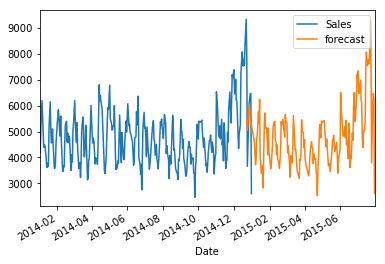

In [28]:
#Plotting actuals for 2014 and predicting 2015 based on only seeing what happened in 2014.
fig, ax = plt.subplots()
ax = store1_sales_data['2014'].plot(ax=ax)
fig = model.plot_predict(1,180, ax=ax, plot_insample=False)

### Walmart Sales Data - independent practice.

For the independent practice, we will analyze the weekly sales data from Walmart over a two year period from 2010 to 2012.

The data is again separated by store and by department, but we will focus on analyzing one store for simplicity.

The data includes:

- Store - the store number
- Dept - the department number
- Date - the week
- Weekly_Sales -  sales for the given department in the given store
- IsHoliday - whether the week is a special holiday week


#### Loading the data and setting the DateTimeIndex

In [22]:
data = pd.read_csv('train.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data[data.Store ==1].head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,1,1,24924.50,False
2010-02-12,1,1,46039.49,True
2010-02-19,1,1,41595.55,False
2010-02-26,1,1,19403.54,False
2010-03-05,1,1,21827.90,False


#### Filter the dataframe to Store 1, then sum sales for each department to compute the total per week.

In [16]:
# resample allows you to aggregate the data, by week in this example.
df_agg = data[data.Store==1][['Weekly_Sales']].resample('W').sum()
df_agg.head()

,Weekly_Sales
Date,
2010-02-07,1643690.90
2010-02-14,1641957.44
2010-02-21,1611968.17
2010-02-28,1409727.59
2010-03-07,1554806.68


#### Plot the rolling_mean for `Weekly_Sales`. What general trends do you observe?

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:5504: FutureWarning: The freq kw is deprecated and will be removed in a future version. You can resample prior to passing to a window function
  on=on, axis=axis)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=10,freq=W,center=True).mean()


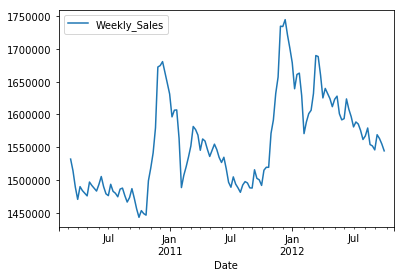

In [28]:
# weekly_sales = 

pd.rolling_mean(df_agg[['Weekly_Sales']], 
                window=10, # the number of time periods to average.
                center=True, # plot the data point at the centre of the window
                freq='W').plot() # the time period to aggregate by 


Sales hae grown year on year and also experience a seasonal spike in January, and smaller peak in March.

#### Compute the 1, 2, 52 autocorrelations for `Weekly_Sales` and/or create an autocorrelation plot.

In [33]:
# 1 auto correlation
print(df_agg.Weekly_Sales.autocorr(1))
print(df_agg.Weekly_Sales.autocorr(2))
print(df_agg.Weekly_Sales.autocorr(52))

0.302158279411
0.127413130554
0.895376029478


This shows that there is some correlation week to week, little correlation for each fortnight.  
But the most correlation is shown annually - autocorrelation is also measured out of 1.

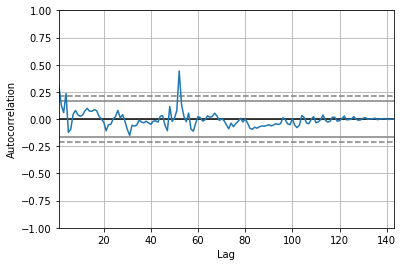

In [39]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(df_agg['Weekly_Sales'])

The chart above shows the effect on correlation as the lag increases, and confirms that the greatest correlation is achieved at 52 weeks/ annually.

#### Split the weekly sales data in a training and test set - using 75% of the data for training

In [68]:
n = len(df_agg.Weekly_Sales)

train = df_agg.Weekly_Sales[:int(.75*n)]
test = df_agg.Weekly_Sales[int(.75*n):] # I think the colon here is to take 75% onwards

print('min', test.index.min())
print('max', test.index.max()) 

min 2012-02-26 00:00:00
max 2012-10-28 00:00:00


#### Create an AR(1) model on the training data and compute the mean absolute error of the predictions.

In [48]:
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error

In [71]:
model = sm.tsa.ARIMA(train, (1, #AR
                             0, #I
                             0) #MA
                    ).fit()

In [72]:
predictions = model.predict(
    '2012-02-26',# This is setting the date range to the min and max of the test set.
    '2012-10-28',
    dynamic=True, 
)

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

Mean absolute error:  81839.3386316


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(1, 0)   Log Likelihood               -1434.663
Method:                       css-mle   S.D. of innovations         160916.939
Date:                Tue, 30 May 2017   AIC                           2875.327
Time:                        21:59:35   BIC                           2883.345
Sample:                    02-07-2010   HQIC                          2878.577
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   2.26e+04     68.293      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.3147      0.093      3.399      0.001         0.133     0.496
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            3.1779           +0.0000j            3.1779            0.0000
-----------------------------------------------------------------------------
"""

#### Plot the residuals - where are their significant errors.

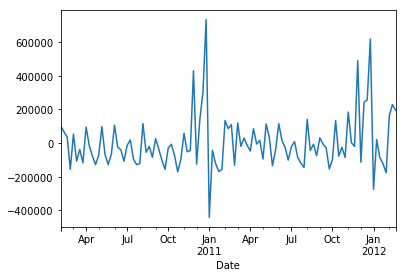

In [73]:
model.resid.plot()

The residuals show the largest errors occur during the peak sale periods, this corresponds with the 0.3 autocorrelation shown above.

#### Compute and AR(2) model and an ARMA(2, 2) model - does this improve your mean absolute error on the held out set.

In [81]:
model = sm.tsa.ARIMA(train, (2, 0, 0)).fit()
predictions = model.predict('2012-02-26','2012-10-28',dynamic=True, )

print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

Mean absolute error:  81203.2343732


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 0)   Log Likelihood               -1434.482
Method:                       css-mle   S.D. of innovations         160638.038
Date:                Tue, 30 May 2017   AIC                           2876.963
Time:                        22:27:51   BIC                           2887.655
Sample:                    02-07-2010   HQIC                          2881.298
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06    2.4e+04     64.349      0.000       1.5e+06  1.59e+06
ar.L1.Weekly_Sales     0.2974      0.097      3.075      0.003         0.108     0.487
ar.L2.Weekly_Sales     0.0589      0.098      0.603      0.548        -0.132     0.250
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.3080           +0.0000j            2.3080            0.0000
AR.2           -7.3587           +0.0000j            7.3587            0.5000
-----------------------------------------------------------------------------
"""

Increasing the lag to 2 improves the MSE, from £81,839 to £81,203.  
AIC increases from 2875.327 to 2876 - how to interpret this? Larger AIC = better.

In [82]:
model = sm.tsa.ARIMA(train, (2,0,2)).fit()

predictions = model.predict('2012-02-26','2012-10-28',dynamic=True, )
print("Mean absolute error: ", mean_absolute_error(test, predictions))
model.summary()

Mean absolute error:  80502.4545171


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           Weekly_Sales   No. Observations:                  107
Model:                     ARMA(2, 2)   Log Likelihood               -1425.781
Method:                       css-mle   S.D. of innovations         144115.354
Date:                Tue, 30 May 2017   AIC                           2863.563
Time:                        22:28:42   BIC                           2879.600
Sample:                    02-07-2010   HQIC                          2870.064
                         - 02-19-2012                                         
======================================================================================
                         coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
const               1.544e+06   1.92e+04     80.320      0.000      1.51e+06  1.58e+06
ar.L1.Weekly_Sales    -1.0398      0.090    -11.583      0.000        -1.216    -0.864
ar.L2.Weekly_Sales    -0.4701      0.087     -5.380      0.000        -0.641    -0.299
ma.L1.Weekly_Sales     1.4691      0.058     25.346      0.000         1.356     1.583
ma.L2.Weekly_Sales     0.9998      0.074     13.533      0.000         0.855     1.145
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1059           -0.9509j            1.4585           -0.3870
AR.2           -1.1059           +0.9509j            1.4585            0.3870
MA.1           -0.7347           -0.6785j            1.0001           -0.3813
MA.2           -0.7347           +0.6785j            1.0001            0.3813
-----------------------------------------------------------------------------
"""

Adding in the Moving Average term further reduceds the MSE, from £81,203 to £80,502.

#### Finally, compute an ARIMA model to improve your prediction error - iterate on the p, q, and parameters comparing the model's performance.  
p: The number of lag observations included in the model, also called the lag order.  
d: The number of times that the raw observations are differenced, also called the degree of differencing.  
q: The size of the moving average window, also called the order of moving average.

In [85]:
for p in range(1,6):
    model = sm.tsa.ARIMA(train, (p, 0, 0) ).fit()
    predictions = model.predict('2012-02-26','2012-10-28',dynamic=True,)
    print(p,"Mean abs error: ", mean_absolute_error(test, predictions))
#     for q in 1 to 20:
#         for i in 0 to 1: 

                             
            

C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)
C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


1 Mean abs error:  81839.3386316
2 Mean abs error:  81203.2343732


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


3 Mean abs error:  81450.9232439


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


4 Mean abs error:  78458.7234505
5 Mean abs error:  78545.0778822


C:\Users\BeckyC\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)
